# Lowlands analysis

## Imports
Loading necessary modules and initialise the parser

In [28]:
import os
import csv
import re
import pandas as pd
import numpy as np
from frog import Frog, FrogOptions


# set up frog
frog = Frog(FrogOptions(parser=False, morph=False,
                            chunking=False, mwu=True,
                            ner=False))

# assign home dir
wd = os.getcwd()

20210730:140333:922:config read from: /home/bma-vandijk/lama/share/frog/nld/frog.cfg
20210730:140333:922:configuration version = 0.12
20210730:140333:922: MWU disabled, because the Parser is deselected
20210730:140333:923:mblem-:Initiating lemmatizer...
ucto: textcat configured from: /home/bma-vandijk/lama/share/ucto/textcat.cfg
20210730:140335:227:tagger-tagger-:reading subsets from /home/bma-vandijk/lama/share/frog/nld//subsets.cgn
20210730:140335:227:tagger-tagger-:reading constraints from /home/bma-vandijk/lama/share/frog/nld//constraints.cgn
20210730:140335:227:Fri Jul 30 14:03:35 2021 Initialization done.


## Preprocessing
We load all the stories in a list of lists, with the latter consisting of story id and story string.
There is some notational information extra in the transcription that is removed with the regexp function remove().


In [18]:
def remove(raw):
    raw = re.sub(r'(X|x)x{2,}', '', raw)                        # removes unclear speech codes (Xxx-xxx)
    raw = re.sub(r'\w+\.?\*n','', raw)                          # removes self-made words, onomatopoeias (*n)
    raw = re.sub(r'(\w+\.?\*a)', '', raw)                       # removes broken off words (*a)
    raw = re.sub(r'\.?\*v', '', raw)                            # removes notation for foreign words (*v)
    raw = re.sub(r'(\w+\-)+(\w+)\.?\*u', r'\2', raw)            # removes restarts of fully pronounced words (*u)
    #raw = re.sub(r"([A-Z]+(\w)*-?(\w)+('(\w)+)?)", '', raw)    # removes capitalized words, single letters
    raw = re.sub(r'[eE]hm', '', raw)                            # removes standard interjection
    raw = re.sub(r'\?{2,}', '', raw)                            # removes two or more ?? in text
    return raw

themes  = ['01', '11', '21'], ['02', '12', '22'], ['03', '13', '23'], ['04', '14', '24'], ['05', '15', '25']

def extract_storystrings():
    
    stories = []
    
    for i in themes:
        story_ids = [f for f in os.listdir(f'{wd}/Lowlands_transcripts') if f[:2] in i]
        story_ids.sort()

        for s in story_ids:
            with open(f'{wd}/Lowlands_transcripts/{s}', mode='r', encoding='utf-8-sig') as f:
                stories.append([s[:4], remove(f.read())])
                
    return dict(stories)

In [19]:
stories = extract_storystrings()

## Analysis
First we like to see how type/token ratios develop once story chains progress. Is this different for the five different stories?

In [53]:
def ttr(storydict):
    stats = []
    
    for i, s  in storydict.items():
        types = len(set([w for w in s.split() if w.islower()]))
        tokens =len([w for w in s.split() if w.islower()])
        stats.append((i, round(types/tokens, 2)))
    
    return dict(stats)

        

<AxesSubplot:>

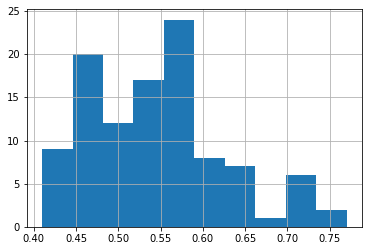

In [85]:
stories_df = pd.DataFrame.from_dict(ttr(stories), orient='index', columns = ['ttr'])
stories_df = stories_df.reset_index()

df['label'] = np.where(
    df['ttr'] == df['B'], 0, np.where(
    df['A'] >  df['B'], 1, -1)) 

index   ttr
0    0100  0.56
1    0101  0.53
2    0102  0.43
3    0103  0.47
4    0104  0.48
..    ...   ...
101  2502  0.47
102  2503  0.54
103  2504  0.52
104  2505  0.54
105  2506  0.54

[106 rows x 2 columns]

Now let's see how POS-tags are distributed.